In [51]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

california_housing = fetch_california_housing(as_frame=True)
data = california_housing.frame


In [52]:
# Print the first few rows of the data
print(data.head())

# Print the summary statistics of the data
print(data.describe())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\prajw\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [56]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7220 - val_loss: 0.4542
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4073 - val_loss: 0.4047
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3812 - val_loss: 0.4049
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3600 - val_loss: 0.3710
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3436 - val_loss: 0.3652
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3400 - val_loss: 0.3382
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3225 - val_loss: 0.3997
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3526 - val_loss: 0.3235
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3174 - val_loss: 0.3356
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3045 - val_loss: 0.3279
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2844 - val_loss: 0.3203
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

In [57]:
# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2727
Test Loss: 0.27657589316368103


In [58]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train_scaled, y_train)


LinearRegression()

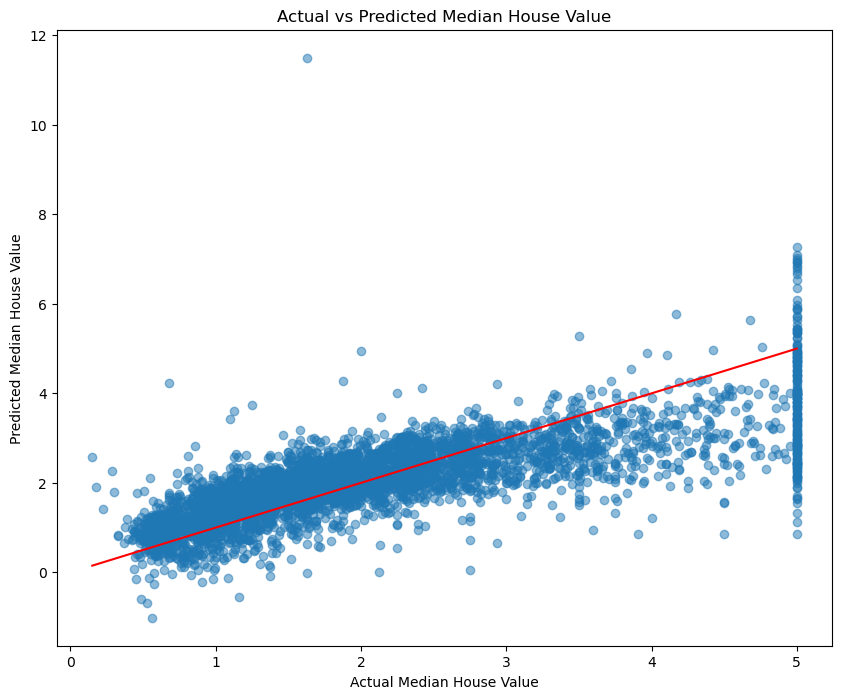

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions
y_pred = lin_reg.predict(X_test_scaled)

# Plot predictions vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect fit
plt.show()


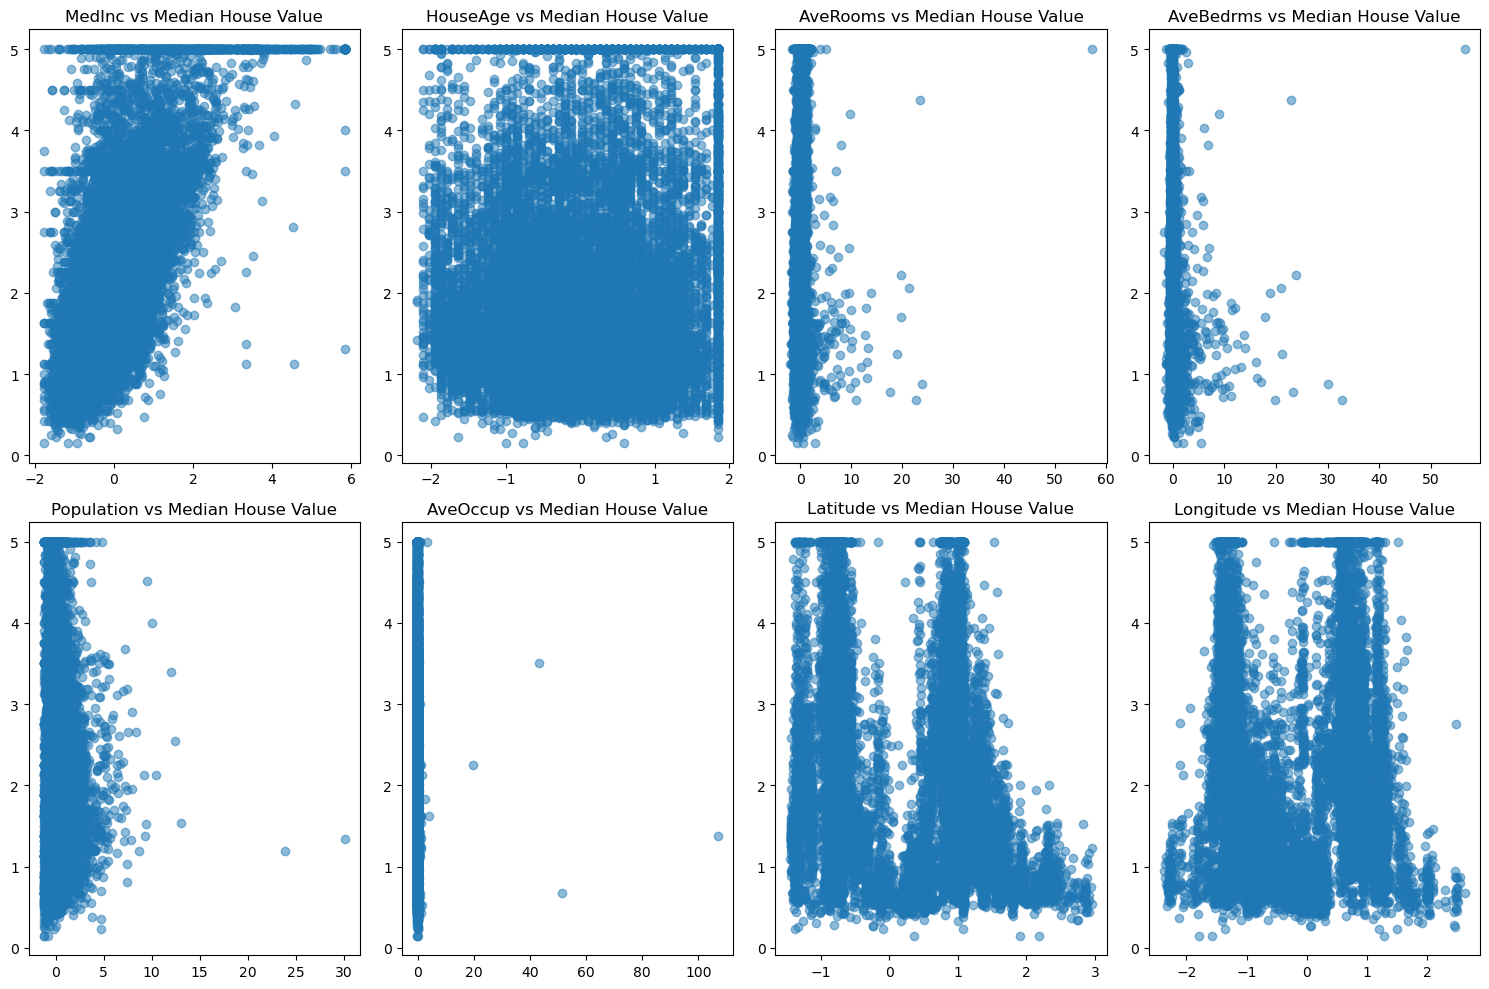

In [60]:
# Plot each feature vs the target variable
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
axs = np.ravel(axs)

for i in range(8):  # There are 8 features
    axs[i].scatter(X_train_scaled[:, i], y_train, alpha=0.5)
    axs[i].set_title(f'{X.columns[i]} vs Median House Value')

plt.tight_layout()
plt.show()


In [61]:
# Generate predictions on the test set
y_pred = model.predict(X_test_scaled)

# Print the first few predictions
print(y_pred[:5])


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0.29184815]
 [0.778339  ]
 [4.7416363 ]
 [2.335049  ]
 [2.4226785 ]]


In [62]:
# Print the first few actual values
print(y_test[:5])


20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: MedHouseVal, dtype: float64


In [63]:
import sklearn
print(sklearn.__version__)

1.2.2
